### Bike Sharing Assignment
#### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

#### Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

#index:

    1. Importing libraries
    2. Reading and Understanding Dataset
    3.Cleaning dataset
    4.EDA
    5.Data Prepration for Linear Regression
    6.Model Biulding
    7.Model Evaluation
    8.Conclusion

 
# 1. Importing Libraries

In [400]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [401]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 2. Reading and understanding data


In [402]:
# Importing day.csv
bikes = pd.read_csv('day.csv')

Data dictionary:
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [403]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [404]:
bikes.shape

(730, 16)

In [405]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [406]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [407]:
bikes.value_counts()

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985     1
480      25-04-2019  2       1   4     0        3        1           1           19.543347  23.51585  42.7917  7.959064   655     5541        6196    1
482      27-04-2019  2       1   4     0        5        1           1           18.757500  22.63185  40.0833  23.291411  1014    5219        6233    1
483      28-04-2019  2       1   4     0        6        0           2           15.443347  18.87520  48.9583  8.708325   1120    3100        4220    1
484      29-04-2019  2       1   4     0        0        0           1           18.791653  22.50605  58.7083  7.832836   2229    4075        6304    1
                                                                                             

# 3.Data Cleaning

Removing unwanted columns

Looking at the data ad the data dictionary, we should remove the following variable as they don't help in the analysis

instant : Its only an index value

dteday : This is the date , the information in this variable is already there in variables like 'year' & 'month'. 

casual & registered : our target variable is cnt which is the sum of these two variables. Hence we can remove this two redundant variables. 


In [408]:
columns_to_drop=["instant","dteday","casual","registered"]
bikes.drop(columns=columns_to_drop,axis=1,inplace =True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [409]:
bikes.shape

(730, 12)

Handling missing Values

In [410]:
#Finding Null values
bikes.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [411]:
bikes.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Conclusion: There are no missing of null values

In [412]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [413]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [414]:
# Separating numerical and categorical variables 
num_col=['temp', 'atemp', 'hum', 'windspeed', 'cnt']      #numerical values

Cat_col=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']     #categorial variables

Checking for outliers

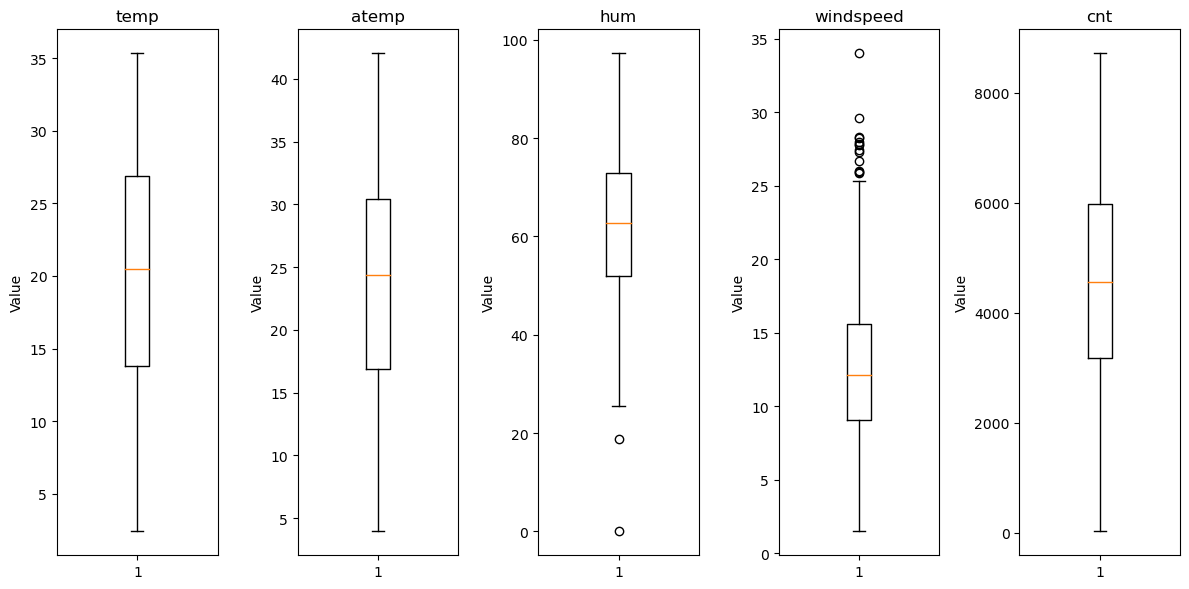

In [415]:

# Plotting boxplots for each numerical column
plt.figure(figsize=(12, 6))  # Set the figure size

for i, col in enumerate(num_col):
    plt.subplot(1, len(num_col), i+1)
    plt.boxplot(bikes[col])
    plt.title(col)
    plt.ylabel('Value')

plt.tight_layout()  # Ensure tight layout of subplots
plt.show()

# 4.EDA

In [416]:
# Converting categorical variables to more intuitive value for EDA
bikes.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikes.weathersit.replace({1:'good',2:'fair',3:'bad',4:'severe'},inplace = True)
bikes.yr.replace({0:'2018',1:'2019'},inplace = True)
bikes.holiday.replace({0:'Yes',1:'No'},inplace = True)
bikes.workingday.replace({0:'Yes',1:'No'},inplace = True)

bikes.mnth = bikes.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikes.weekday = bikes.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,Yes,sat,Yes,fair,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,Yes,sun,Yes,fair,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,Yes,mon,No,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,Yes,tue,No,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,Yes,wed,No,good,9.305237,11.46350,43.6957,12.522300,1600


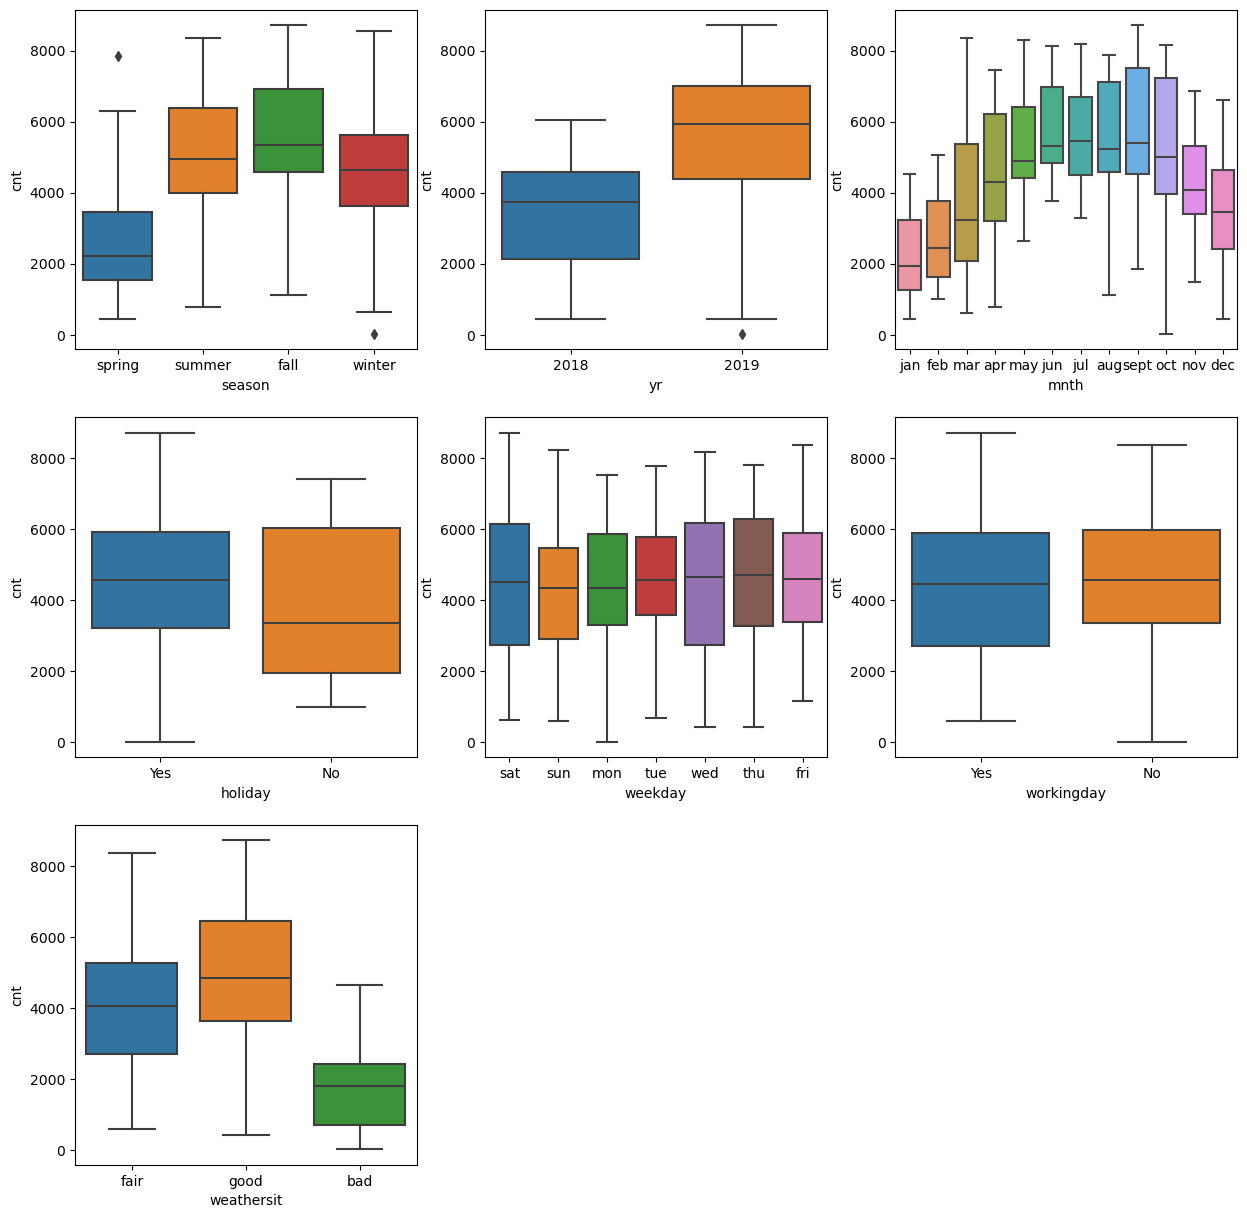

In [417]:
# Boxplot for categorical variables to see demands
plt.figure(figsize=(15, 15))
for i in enumerate(Cat_col):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikes, x=i[1], y='cnt')
plt.show()

Conclusion:

1. Season "fall" has highest demand for rental bikes
2. Demand has increased in the year 2019 compared to 2018
3. Demand continuusly increases till July after that the demand decreases
4. When there is a holiday, demand has decreased.
5. The demand does not vary much with the day of the week or 
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

Drawing pairplots to check realtionship

<Figure size 1500x3000 with 0 Axes>

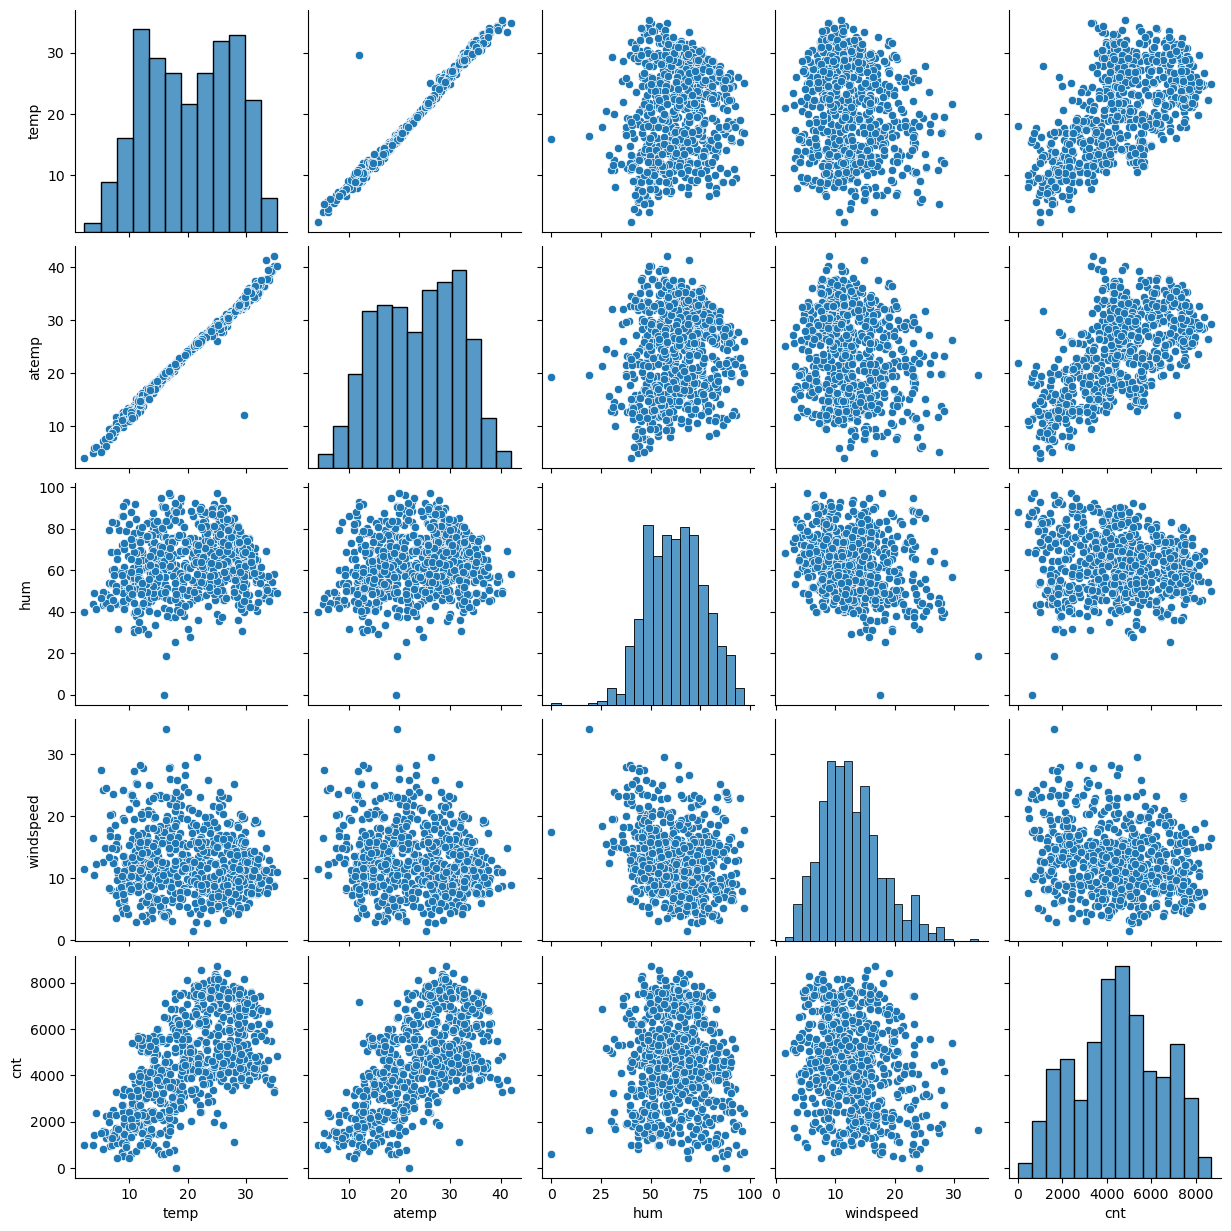

In [418]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bikes,vars=num_col)
plt.show()

#### _`conclusion`_: 
- temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other
#### As seen from the above plot , cnt has a linear relationship with variables like temp, atemp. 

#### Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 2000x1500 with 0 Axes>

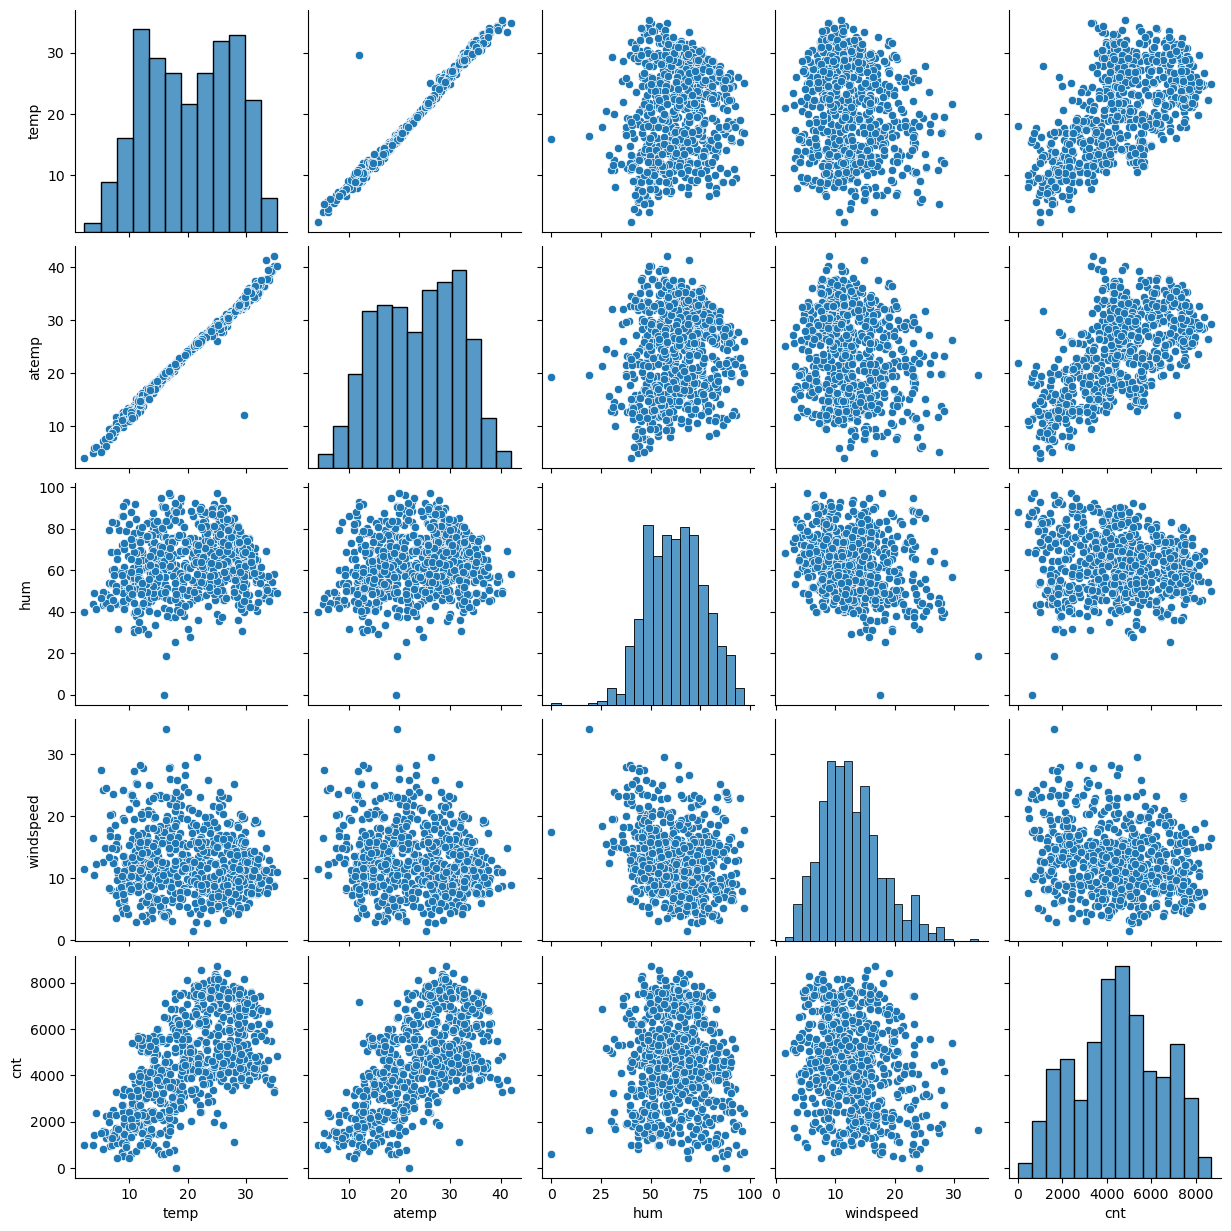

In [419]:
plt.figure(figsize=(20,15))
sns.pairplot(bikes)
plt.show()

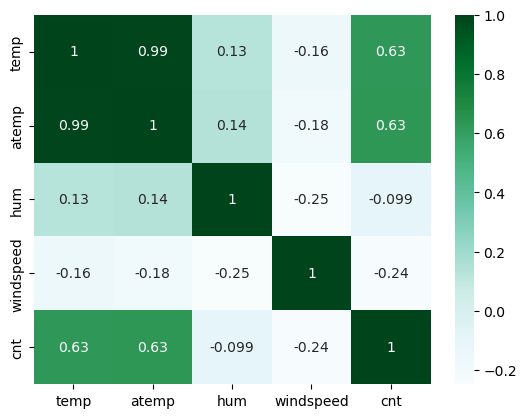

In [420]:
# Checking continuous variables relationship with each other to see if there is any multicolinearity
sns.heatmap(bikes[num_col].corr(), cmap='BuGn', annot = True)
plt.show()

We can see the temp and atemp are highly correlated(0.99). This can cause issues in the model so we will drop atemp column

In [421]:
bikes.drop(columns='atemp',axis=1,inplace =True)
num_col=['temp','hum', 'windspeed', 'cnt'] 
Cat_col=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
bikes.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,Yes,sat,Yes,fair,14.110847,80.5833,10.749882,985
1,spring,2018,jan,Yes,sun,Yes,fair,14.902598,69.6087,16.652113,801
2,spring,2018,jan,Yes,mon,No,good,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,Yes,tue,No,good,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,Yes,wed,No,good,9.305237,43.6957,12.522300,1600


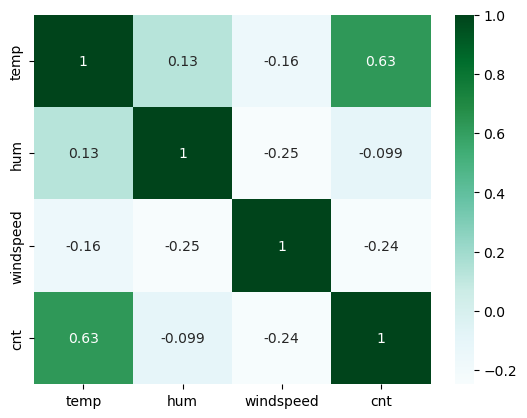

In [422]:
# Checking again continuous variables relationship with each other to see if there is any multicolinearity
num_col=['temp','hum', 'windspeed', 'cnt'] 
sns.heatmap(bikes[num_col].corr(), cmap='BuGn', annot = True)
plt.show()

Other numerical columns seems fine to proceed

#### Analysing numerical variables with target variables

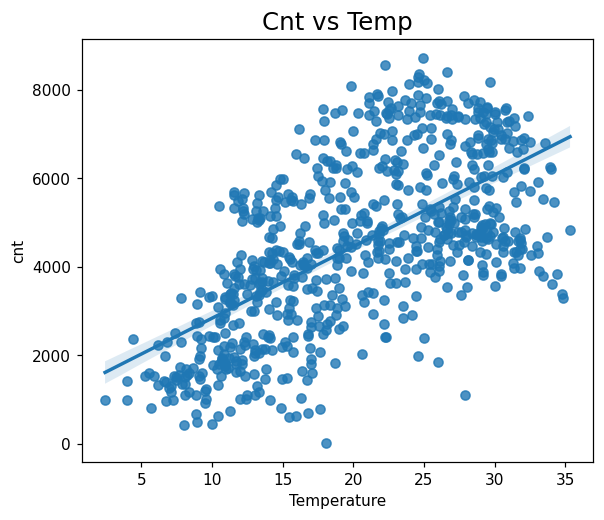

In [423]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikes,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### _`Conclusion`_:
- Demand for bikes is positively correlated to temp and it seems a linear relationship


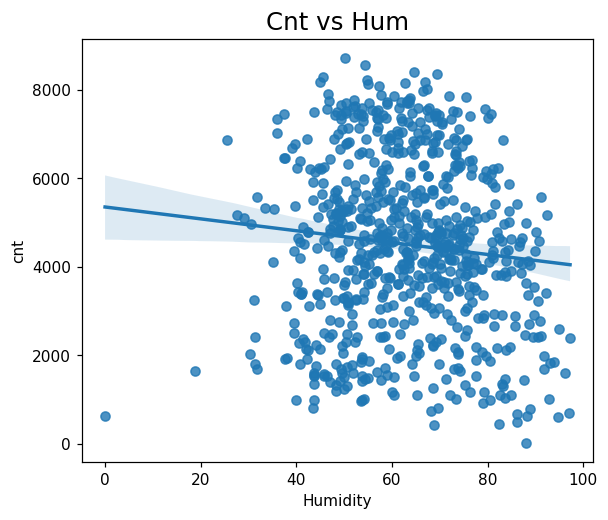

In [424]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikes,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### _`Conclusion`_:
- Hum is values are more scattered around and random but we can see cnt decreasing with increase in humidity


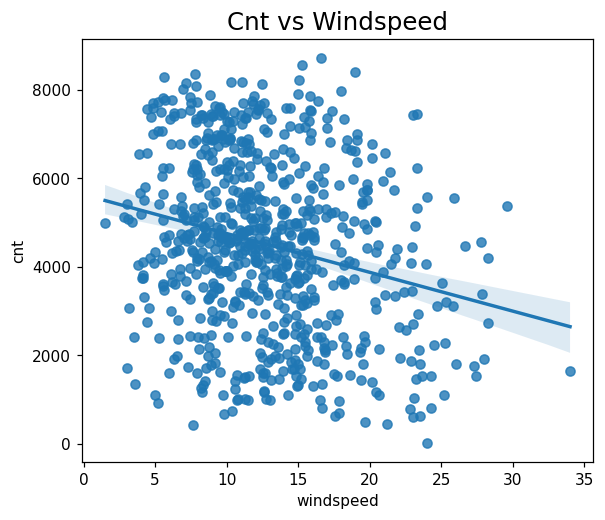

In [425]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikes,y="cnt",x="windspeed")
plt.show()

#### _`Conclusion`_:
- windspeed is values are more scattered around and random but we can see cnt decreasing with increase in humidity

In [426]:
bikes.describe() # analysing numerical columns

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


# 5. Data Prepration For Linear regression

#### 5.1 Create dummy variables for all categorical variables

In [427]:
bikes = pd.get_dummies(data=bikes,columns=Cat_col,drop_first=True)


- Dropping the first columns as (p-1) dummies can explain p categories.


In [428]:
bikes.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,holiday_Yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_Yes,weathersit_fair,weathersit_good
0,14.110847,80.5833,10.749882,985,True,False,False,False,False,False,...,True,False,True,False,False,False,False,True,True,False
1,14.902598,69.6087,16.652113,801,True,False,False,False,False,False,...,True,False,False,True,False,False,False,True,True,False
2,8.050924,43.7273,16.636703,1349,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
3,8.200000,59.0435,10.739832,1562,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
4,9.305237,43.6957,12.522300,1600,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [429]:
bikes.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sept', 'holiday_Yes', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'workingday_Yes', 'weathersit_fair', 'weathersit_good'],
      dtype='object')

#### 5.2 Split Data into training and test

In [430]:
#y to contain only target variable
y=bikes.pop('cnt')

#X is all remainign variable also our independent variables
X=bikes

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [431]:
#Inspect independent variables
X.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,...,holiday_Yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_Yes,weathersit_fair,weathersit_good
0,14.110847,80.5833,10.749882,True,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,True,False
1,14.902598,69.6087,16.652113,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,True,False
2,8.050924,43.7273,16.636703,True,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
3,8.200000,59.0435,10.739832,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
4,9.305237,43.6957,12.522300,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [432]:
# Checking shape of train and test
print(X_train.shape)
print(X_test.shape)

(511, 28)
(219, 28)


#### 5.3 Feature scaling

In [433]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [434]:
# Let us scale continuous variables
num_vars = ['temp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [435]:
#Inspect stats fro Training set after scaling
X_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,...,holiday_Yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_Yes,weathersit_fair,weathersit_good
653,0.509887,0.575354,0.300794,False,False,True,True,False,False,False,...,True,False,False,False,False,True,False,False,False,True
576,0.815169,0.725633,0.264686,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,True
426,0.442393,0.640189,0.255342,True,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,True,False
728,0.245101,0.498067,0.663106,True,False,False,True,False,True,False,...,True,False,False,True,False,False,False,True,False,True
482,0.395666,0.504508,0.188475,False,True,False,True,False,False,False,...,True,False,True,False,False,False,False,True,True,False


# 6. Model Building

#### 6.1 Top feature selection using RFE

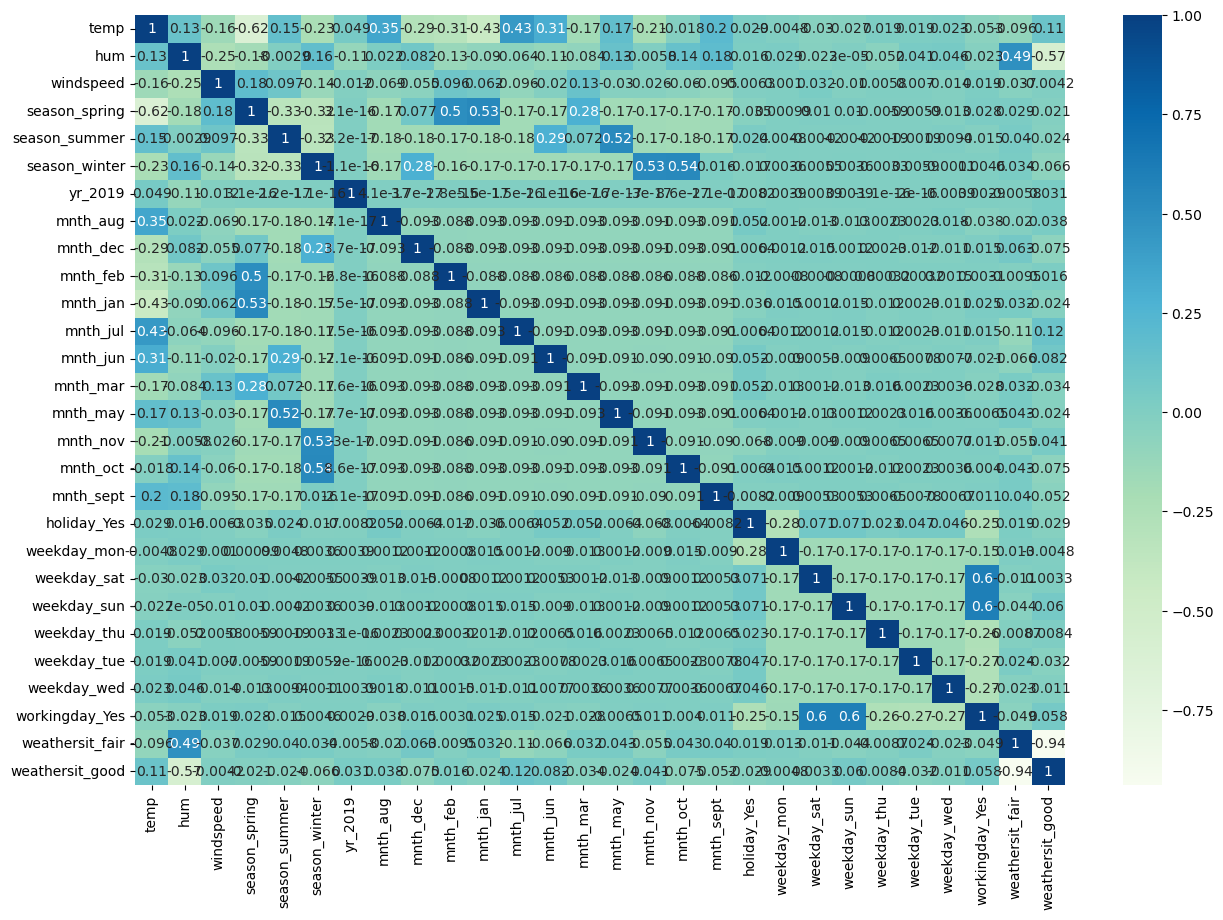

In [436]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikes.corr(), cmap='GnBu', annot=True)
plt.show()

In [437]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

# Running RFE with the output number of variables equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

# Assuming X_train is your feature matrix
rfe = RFE(lm,n_features_to_select=20)              
rfe = rfe.fit(X_train, y_train)

In [438]:
rfe_table=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)

,Feature,support,Rank
0,temp,True,1
25,workingday_Yes,True,1
20,weekday_sat,True,1
18,holiday_Yes,True,1
17,mnth_sept,True,1
15,mnth_nov,True,1
14,mnth_may,True,1
26,weathersit_fair,True,1
11,mnth_jul,True,1
10,mnth_jan,True,1


#### Now we have the top 20 features lets build a model using these fetures

In [439]:
# selecting columns based of RFE
selected_features= X_train.columns[rfe.support_]
selected_features

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_may', 'mnth_nov', 'mnth_sept',
       'holiday_Yes', 'weekday_sat', 'workingday_Yes', 'weathersit_fair',
       'weathersit_good'],
      dtype='object')

In [440]:
#Selecting selected feature for model creation
X_train_rfe = X_train[selected_features]

In [441]:
X_train_rfe.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_may,mnth_nov,mnth_sept,holiday_Yes,weekday_sat,workingday_Yes,weathersit_fair,weathersit_good
653,0.509887,0.575354,0.300794,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True
576,0.815169,0.725633,0.264686,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True
426,0.442393,0.640189,0.255342,True,False,False,True,False,False,False,False,False,False,False,False,True,True,True,True,False
728,0.245101,0.498067,0.663106,True,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,True
482,0.395666,0.504508,0.188475,False,True,False,True,False,False,False,False,False,False,False,False,True,True,True,True,False


In [442]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_1= sm.OLS(y_train, X_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.0
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.30e-188
Time:                        18:56:56   Log-Likelihood:                -4108.5
No. Observations:                 511   AIC:                             8259.
Df Residuals:                     490   BIC:                             8348.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             289.0922    494.915     

In [443]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features    VIF
15      holiday_Yes  35.23
1               hum  31.88
0              temp  28.53
19  weathersit_good  19.96
18  weathersit_fair  10.93
3     season_spring   9.58
4     season_summer   7.50
5     season_winter   7.31
2         windspeed   5.00
7          mnth_aug   3.36
11         mnth_jul   2.93
17   workingday_Yes   2.72
10         mnth_jan   2.52
14        mnth_sept   2.28
6           yr_2019   2.12
16      weekday_sat   2.11
9          mnth_feb   1.96
13         mnth_nov   1.91
8          mnth_dec   1.77
12         mnth_may   1.61


#### 6.2 Removing month_aug for its high p value

In [444]:
# Drop the column "month_aug" from the DataFrame 'x_train_rfe'
X_train_rfe.drop(["mnth_aug"], axis=1, inplace=True)
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_2 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr_2.summary())

# Check VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.6
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.27e-189
Time:                        18:56:56   Log-Likelihood:                -4108.7
No. Observations:                 511   AIC:                             8257.
Df Residuals:                     491   BIC:                             8342.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             350.7226    484.400     

#### 6.3 Since workingday and holiday essentially give the same information they have high VIF. Removing 'holiday-yes' for its high VIF value

In [445]:
# Drop the column "month_aug" from the DataFrame 'x_train_rfe'
X_train_rfe.drop(["holiday_Yes"], axis=1, inplace=True)
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_3 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr_3.summary())

# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     156.0
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          5.15e-190
Time:                        18:56:57   Log-Likelihood:                -4110.4
No. Observations:                 511   AIC:                             8259.
Df Residuals:                     492   BIC:                             8339.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             795.7945    418.901     

#### 6.4Removing month_aug for its high p value

In [446]:
# Drop the column "mnth_may" from the DataFrame 'x_train_rfe'
X_train_rfe.drop(["mnth_may"], axis=1, inplace=True)
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_4 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr_4.summary())

# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.7
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.00e-190
Time:                        18:56:57   Log-Likelihood:                -4111.3
No. Observations:                 511   AIC:                             8259.
Df Residuals:                     493   BIC:                             8335.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             688.5308    411.909     

#### 6.5 removing mnth_feb for its high p value

In [447]:
# Drop the column "mnth_feb" from the DataFrame 'x_train_rfe'
X_train_rfe.drop(["mnth_feb"], axis=1, inplace=True)
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_5 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr_5.summary())

# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          3.00e-191
Time:                        18:56:57   Log-Likelihood:                -4112.8
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     494   BIC:                             8332.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             597.7663    409.067     

#### 6.6 Removig hum for its high VIF

In [448]:
# Drop the column "hum" from the DataFrame 'x_train_rfe'
X_train_rfe.drop(["hum"], axis=1, inplace=True)
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_6 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr_6.summary())

# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.5
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          4.86e-189
Time:                        18:56:57   Log-Likelihood:                -4120.8
No. Observations:                 511   AIC:                             8274.
Df Residuals:                     495   BIC:                             8341.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -358.6029    335.261     

#### 6.7 removing weathersit_good due to its high VIF

In [449]:
# Drop the column "weathersit_good" from the DataFrame 'x_train_rfe'
X_train_rfe.drop(["weathersit_good"], axis=1, inplace=True)
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_7 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr_7.summary())

# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.6
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          8.50e-162
Time:                        18:56:57   Log-Likelihood:                -4188.5
No. Observations:                 511   AIC:                             8407.
Df Residuals:                     496   BIC:                             8471.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1980.6142    314.360     

#### 6.8 removing mnth_nov due to its high p value

In [450]:
# Drop the column "mnth_nov" from the DataFrame 'x_train_rfe'
X_train_rfe.drop(["mnth_nov"], axis=1, inplace=True)
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_8 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr_8.summary())

# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     149.9
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.71e-162
Time:                        18:56:57   Log-Likelihood:                -4189.5
No. Observations:                 511   AIC:                             8407.
Df Residuals:                     497   BIC:                             8466.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1874.8574    304.894     

#### 6.9 Removing mnth_dec due to its high p value

In [451]:
# Drop the column "mnth_dec" from the DataFrame 'x_train_rfe'
X_train_rfe.drop(["mnth_dec"], axis=1, inplace=True)
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_9 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr_9.summary())

# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     162.2
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.40e-163
Time:                        18:56:57   Log-Likelihood:                -4190.1
No. Observations:                 511   AIC:                             8406.
Df Residuals:                     498   BIC:                             8461.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1796.1198    296.441     

#### 6.10 Removing mnth_jan die to its high p value

In [452]:
# Drop the column "mnth_jan" from the DataFrame 'x_train_rfe'
X_train_rfe.drop(["mnth_jan"], axis=1, inplace=True)
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_10 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr_10.summary())

# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     176.0
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          7.70e-164
Time:                        18:56:57   Log-Likelihood:                -4191.6
No. Observations:                 511   AIC:                             8407.
Df Residuals:                     499   BIC:                             8458.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1671.5617    288.066     

#### `_Conclusion`_
Here VIF seems to be almost accepted. p-value for all the features is less tha 0.05 and R2 is 0.795
Let us select Model 10 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

# 7. Model Evaluation

#### 7.1 Residual Analysis

In [453]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [454]:
#Let us build the finalmodel using sklearn
cols = ['yr_2019', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_fair', 'temp','windspeed','workingday_Yes','season_summer']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1671.5616993949511 [ 2085.85145383  -511.59582809  -451.73473809   651.53552608
   560.44717082   505.63865656  -595.00454357  4390.81844756
 -1558.70461469  -407.75142995   442.60422389]


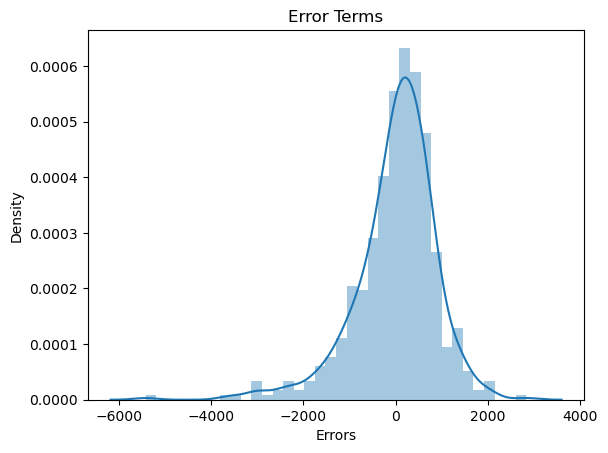

In [455]:
y_train_pred = lr.predict(X_train[cols])
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
plot_res_dist(y_train, y_train_pred)

#### Errors are normally distribured here with mean 0.Seems to be fine

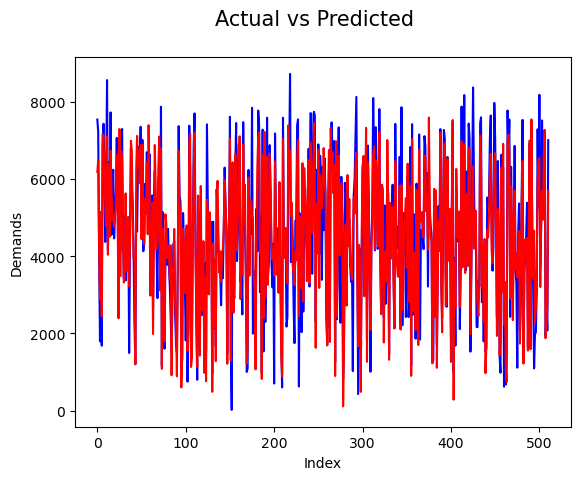

In [456]:
# Actual vs Predicted demand
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and predicted value follow the same pattern so model seems fine

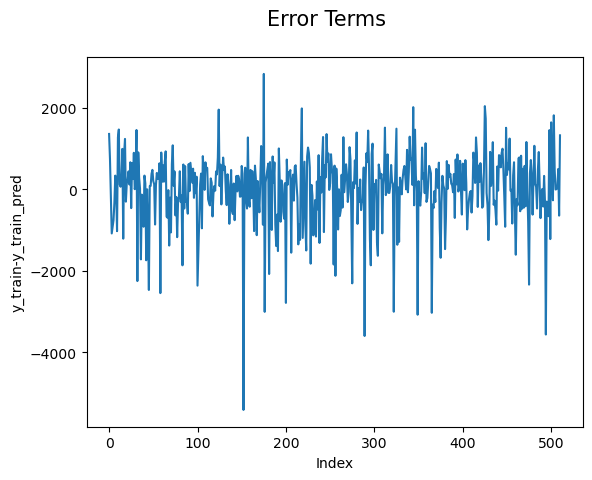

In [457]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Error terms are independednt and have the almost the same variance throughoout

In [458]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7950747666425287

We get the same R2 value as our final model in mlr_10

#### 7.2 Predicting demand from test data

In [459]:
#Scale variables in X_test
num_vars = ['temp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [460]:
#Columns from our final model
cols = ['yr_2019', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_fair', 'temp','windspeed','workingday_Yes','season_summer']


#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### 7.3 R-Squared value for test predictions

In [461]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7789869852020328

We get similar R2 value for the test data

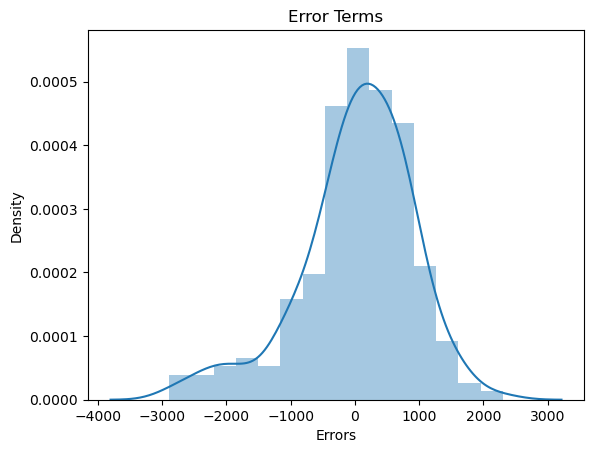

In [462]:
# residual for X_test
plot_res_dist(y_test, y_test_pred)

Errors are normally distributed around 0

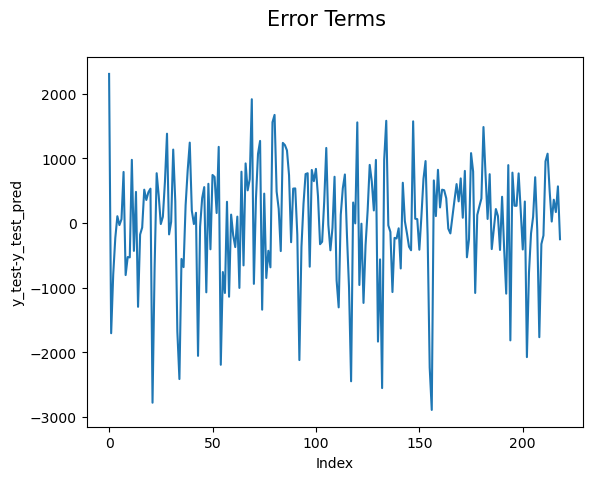

In [463]:
# Error Terms
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test-y_test_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_test-y_test_pred')
plt.show()

#### 7.4 Plot Test vs Predicted test values

In [464]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

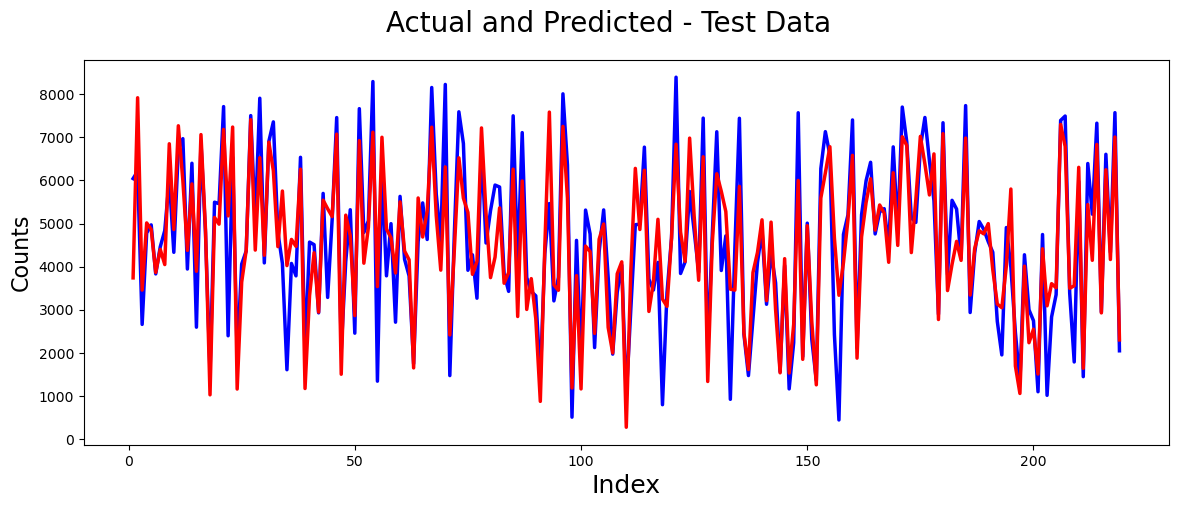

In [465]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

Actual and predicted demand for y_test follow the same pattern

### 8. Conclusion

The demand for shared bikes is linearly modeled using 11 features. First top 20 features were selected using RFE which 
was followed by eliminating features using the p-value(statistical significance) and VIF(checking for multicolinearity).
The final model had the following features and there coefficients

In [466]:
mlr_10.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     176.0
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          7.70e-164
Time:                        18:57:00   Log-Likelihood:                -4191.6
No. Observations:                 511   AIC:                             8407.
Df Residuals:                     499   BIC:                             8458.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1671.5617    288.066      5.803      0.000    1105.591    2237.533
temp             4390.8184    322.621     13.610      0.000    3756.956    5024.681
windspeed       -1558.7046    242.944     -6.416      0.000   -2036.024   -1081.385
season_spring    -511.5958    205.287     -2.492      0.013    -914.928    -108.263
season_summer     442.6042    147.914      2.992      0.003     151.994     733.214
season_winter     651.5355    167.438      3.891      0.000     322.565     980.507
yr_2019          2085.8515     79.811     26.135      0.000    1929.043    2242.659
mnth_jul         -451.7347    181.213     -2.493      0.013    -807.770     -95.700
mnth_sept         560.4472    164.739      3.402      0.001     236.780     884.114
weekday_sat       505.6387    139.625      3.621      0.000     231.313     779.964
workingday_Yes   -407.7514    108.362     -3.763      0.000    -620.653    -194.850
weathersit_fair  -595.0045     84.379     -7.052      0.000    -760.787    -429.222
==============================================================================
Omnibus:                      144.025   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              529.734
Skew:                          -1.253   Prob(JB):                    9.33e-116
Kurtosis:                       7.312   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interepretation of results
### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

### _`significant variables`_
Significant variables to predict the demand for shared bikes
- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)